In [1]:
"""
Author : Byunghyun Ban
Date : 2020.07.17.
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow import keras

import time
try:
    from matplotlib import pyplot as plt
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'matplotlib'])
    try:
        from matplotlib import pyplot as plt
    except ModuleNotFoundError:
        time.sleep(2)
        from matplotlib import pyplot as plt

try:
    import numpy as np
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'numpy'])
    try:
        import numpy as np
    except ModuleNotFoundError:
        time.sleep(2)
        import numpy as np


# 데이터를 떠먹여 줄 클래스를 제작합니다.
# datareader로 인해 데이터를 다운로드, 라벨도 미리 입력
class DataReader:
    def __init__(self):
        self.label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
        self.cifar = keras.datasets.cifar10
        (self.origin_train_X, self.train_Y), (self.origin_test_X, self.test_Y) = self.cifar.load_data()

        self.train_X = self.preprocess(self.origin_train_X)
        self.test_X = self.preprocess(self.origin_test_X)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    # 데이터 전처리 이미지를 255.0으로 나누어 처리
    # RGB 설정, 0,1,2 로 레드 그린 블루를 설정하고
    # 3으로 나누어 처리
    def preprocess(self, images):
        images = images / 255.0
        r = images[:, :, :, 0]
        g = images[:, :, :, 1]
        b = images[:, :, :, 2]
        return (r + g + b) / 3.0

    def show_raw_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.origin_train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label_names[int(self.train_Y[i])])
        plt.show()

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label_names[int(self.train_Y[i])])
        plt.show()


def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


170498071/170498071 [==============================] - 122s 1us/step


Data Read Done!
Training X Size : (50000, 32, 32)
Training Y Size : (50000, 1)
Test X Size : (10000, 32, 32)
Test Y Size : (10000, 1)




************ TRAINING START ************ 
Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0524 - accuracy: 0.2538 - val_loss: 1.9519 - val_accuracy: 0.3086
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9305 - accuracy: 0.3086 - val_loss: 1.9031 - val_accuracy: 0.3166
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8788 - accuracy: 0.3306 - val_loss: 1.8625 - val_accuracy: 0.3390
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8424 - accuracy: 0.3457 - val_loss: 1.8265 - val_accuracy: 0.3533
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8208 - accuracy: 0.3524 - val_loss: 1.8340 - val_accuracy: 0.3490
Epoch 6/20
1563/1563 [=======

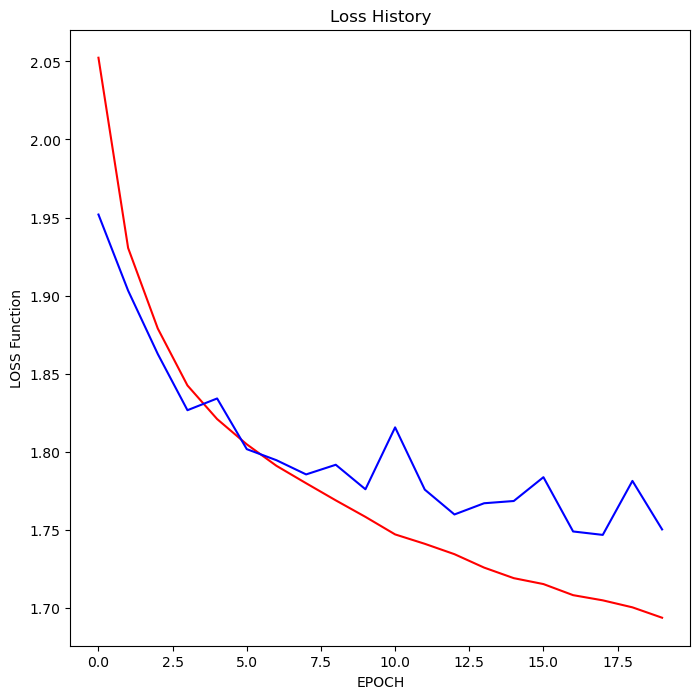

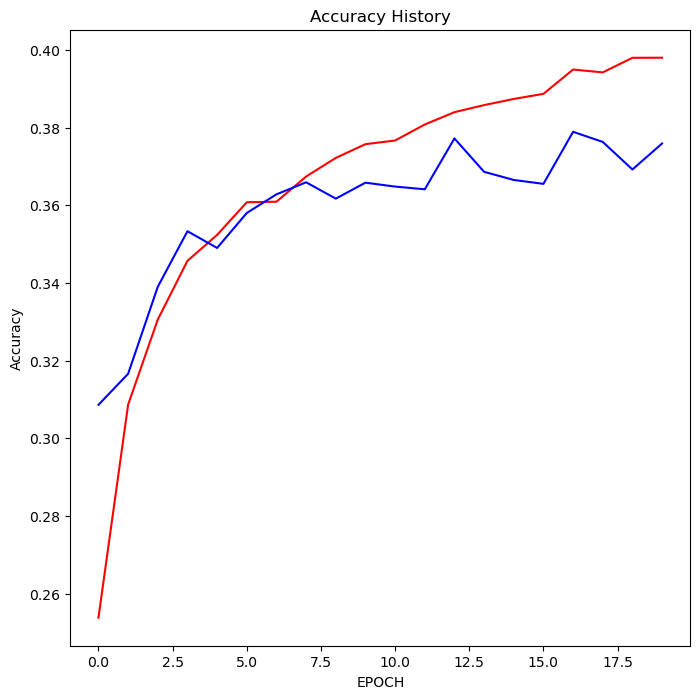

In [2]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)


## 결과
- 네트워크가 제대로 CIFAR-10의 데이터를 학습하지 못함.
- 이유는 epoch이 진행되는데도 accuracy가 올라가지 않고 유지되기때문임.
- overfitting이 되었는데 적어도 training에 매몰되었다는 말임
- 하지만 결과는 정확도가 너무 낮다.
- 즉, overfitting이 될때까지 학습을 진행하였고, 이 인공지능의 태생적 한계이다. FNN의 한계이다.